Load Julia packages (libraries) needed

### snippet 0.5 is replaced by below `using StatisticalRethinking`.

In [1]:
using StatisticalRethinking, GLM
gr(size=(500, 500));

### snippet 0.4

Below `dataset(...)` provides access to often used R datasets.
If this is not a common R dataset, see the chapter 4 snippets.

In [2]:
cars = dataset("datasets", "cars");
first(cars, 5)

,Speed,Dist
,Int64⍰,Int64⍰
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


Fit a linear regression of distance on speed

In [3]:
m = lm(@formula(Dist ~ Speed), cars)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Dist ~ 1 + Speed

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -17.5791   6.75844 -2.60106   0.0123
Speed         3.93241  0.415513  9.46399   <1e-11


estimated coefficients from the model

In [4]:
coef(m)

2-element Array{Float64,1}:
 -17.57909489051096 
   3.932408759124088

Plot residuals against speed

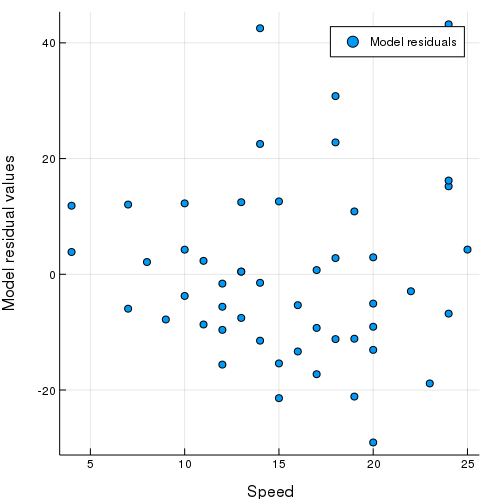

In [5]:
scatter( cars[:Speed], residuals(m),
  xlab="Speed", ylab="Model residual values", lab="Model residuals")
# End of `clip_04_05.jl`
# *This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*